In [1]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
mixed_dir = "/home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/monkeys_0.01_0.000001_1.0/ramping_soc/seed_0_mixed"
mov_dir = "/home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/monkeys_0.01_0.000001_1.0/ramping_soc/seed_0_mov"
prep_dir = "/home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/monkeys_0.01_0.000001_1.0/ramping_soc/seed_0_prep"
palette = sns.color_palette("YlOrBr", as_cmap=True)


In [2]:
obs_id_mixed = np.loadtxt(f"{mixed_dir}/obs_id_proj")
obs_c_mixed = np.loadtxt(f"{mixed_dir}/obs_c_proj")
ctr_mixed =  np.loadtxt(f"{mixed_dir}/ctrl_proj")
obs_id_prep = np.loadtxt(f"{prep_dir}/obs_id_proj")
obs_c_prep = np.loadtxt(f"{prep_dir}/obs_c_proj")
ctr_prep =  np.loadtxt(f"{prep_dir}/ctrl_proj")
obs_id_mov = np.loadtxt(f"{mov_dir}/obs_id_proj")
obs_c_mov = np.loadtxt(f"{mov_dir}/obs_c_proj")
ctr_mov =  np.loadtxt(f"{mov_dir}/ctrl_proj")

In [3]:
import numpy as np
import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec
import matplotlib.lines as mlines

# plt.style.use(['paper.mplstyle'])
text_width = 6.30107 # in  --> Confirmed with template explanation

fs_m1 = 6  # for figure ticks
fs = 8  # for regular figure text
fs_p1 = 9  # figure titles



# axes.spines.right   : False
# axes.spines.top     : False
mpl.rcParams['axes.spines.right'] =  False
mpl.rcParams['axes.spines.top'] =  False
# matplotlib.rc('axes.spines.top', set_visible=False)
matplotlib.rc('text', usetex=True)
matplotlib.rc('font', size=fs)          # controls default text sizes
matplotlib.rc('axes', titlesize=fs)     # fontsize of the axes title
matplotlib.rc('axes', labelsize=fs)    # fontsize of the x and y labels
matplotlib.rc('xtick', labelsize=fs_m1)    # fontsize of the tick labels
matplotlib.rc('ytick', labelsize=fs_m1)    # fontsize of the tick labels
matplotlib.rc('legend', fontsize=fs_m1)    # legend fontsize
matplotlib.rc('figure', titlesize=fs_p1)  # fontsize of the figure title
matplotlib.rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})



In [28]:
obs_eigs_mixed = np.linalg.norm(np.loadtxt(f"{mixed_dir}/obs_c_eigs"),axis=1)
obs_eigs_mixed = obs_eigs_mixed/np.max(obs_eigs_mixed)*1000
ctr_eigs_mixed =  np.linalg.norm(np.loadtxt(f"{mixed_dir}/ctr_eigs"),axis=1)
ctr_eigs_mixed = ctr_eigs_mixed/np.max(ctr_eigs_mixed)*1000
obs_eigs_prep = np.linalg.norm(np.loadtxt(f"{prep_dir}/obs_c_eigs"),axis=1)
obs_eigs_prep = obs_eigs_prep/np.max(obs_eigs_prep)*1000
ctr_eigs_prep =  np.linalg.norm(np.loadtxt(f"{prep_dir}/ctr_eigs"),axis=1)
ctr_eigs_prep= ctr_eigs_prep/np.max(ctr_eigs_prep)*1000
obs_eigs_mov = np.linalg.norm(np.loadtxt(f"{mov_dir}/obs_c_eigs"),axis=1)
obs_eigs_mov= obs_eigs_mov/np.max(obs_eigs_mov)*1000
ctr_eigs_mov =  np.linalg.norm(np.loadtxt(f"{mov_dir}/ctr_eigs"),axis=1)
log_ctr_eigs = np.log(ctr_eigs_mixed)
log_obs_eigs = np.log(obs_eigs_mixed)
print(obs_eigs_mixed[0])

1000.0


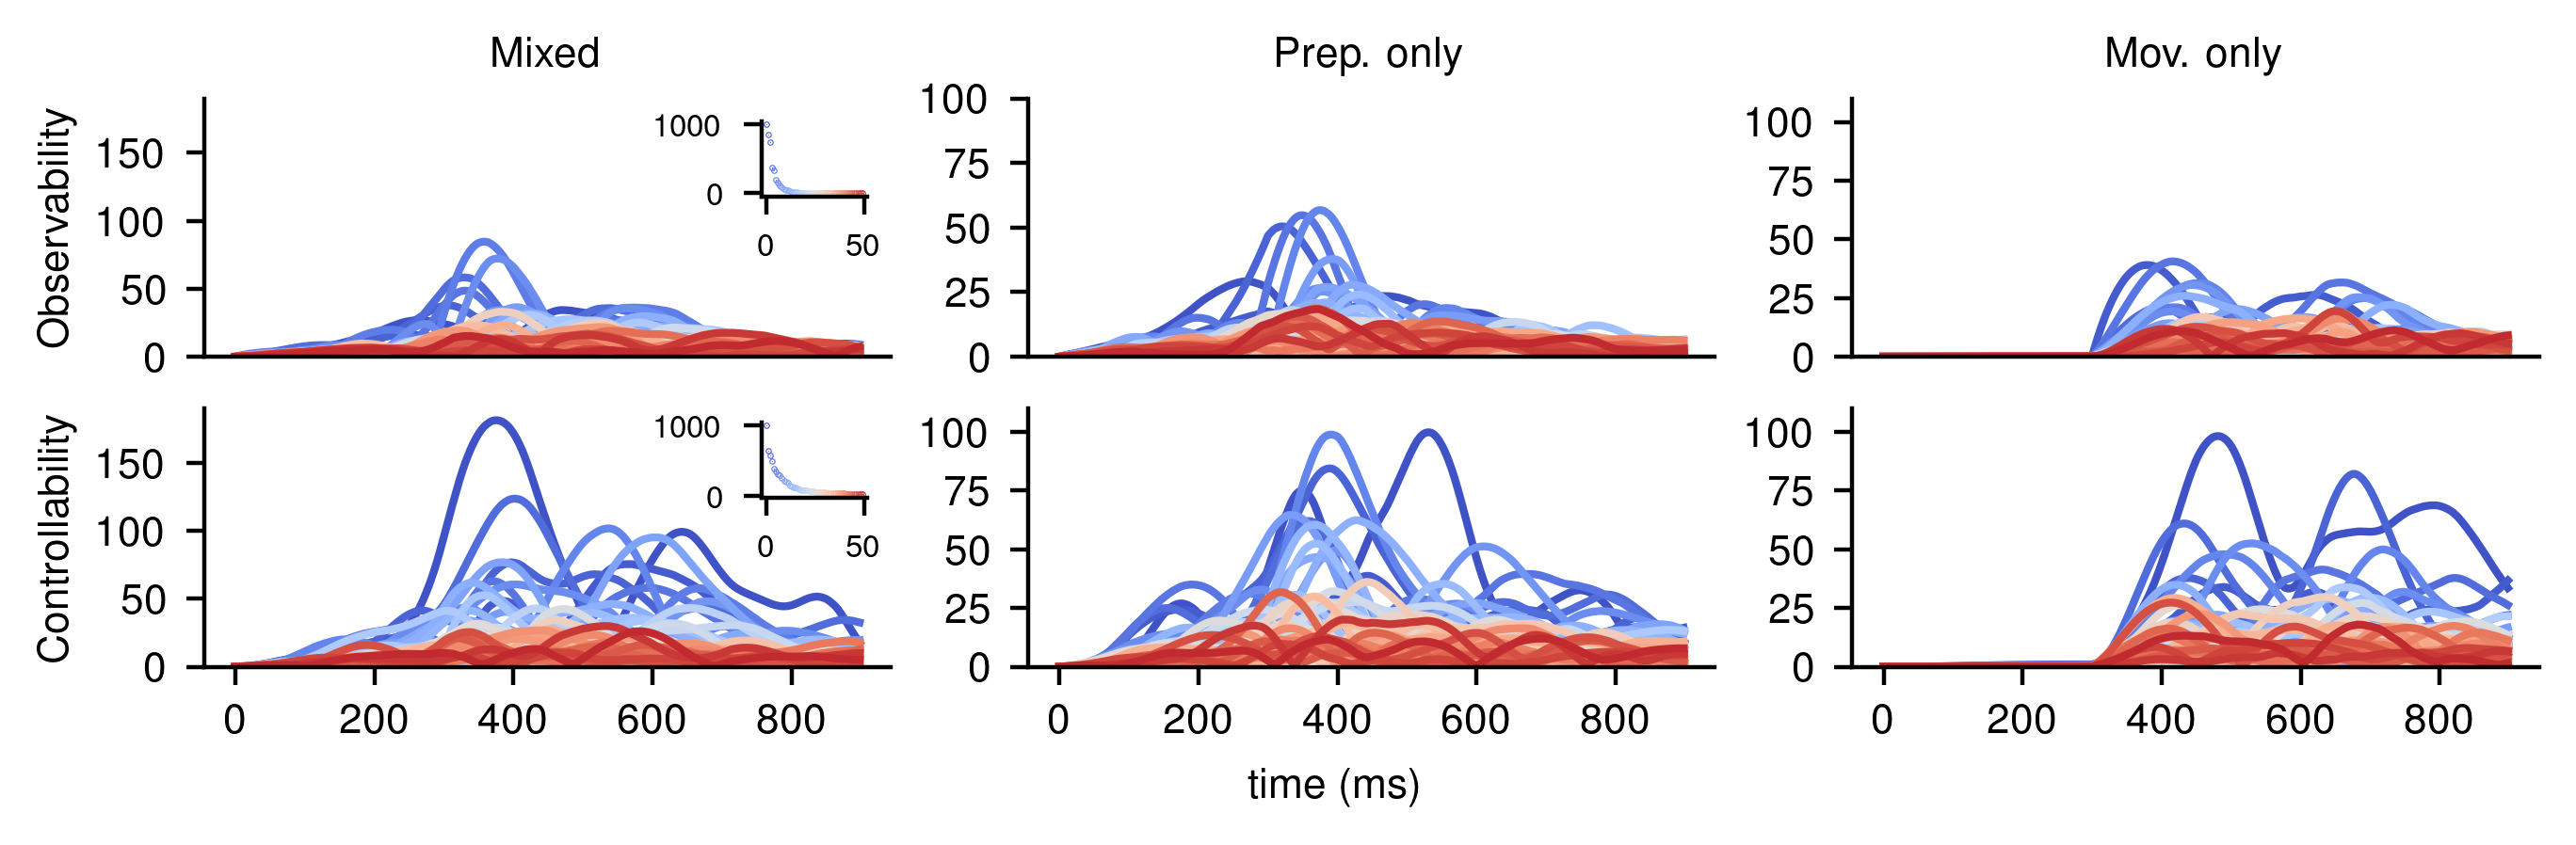

In [43]:

fig,axes=plt.subplots(2,3, figsize=(8, 2),dpi=400)
font = {'family':'sans-serif','sans-serif':'Helvetica'}
mpl.rcParams['font.family'] = "sans-serif"
mpl.rcParams['font.sans-serif'] = ['Helvetica']
matplotlib.rc('axes', titlesize=fs)     # fontsize of the axes title
matplotlib.rc('axes', labelsize=fs)   
# mpl.rcParams['xtick.font'] = ['Helvetica']
n = 50
n_shift = 0
p = sns.color_palette("coolwarm", n+n_shift +1)
for i in range(n):
    o = obs_c_mixed[:,i]
    # o_max = np.abs(o).max()  
    # if not(np.isclose(np.max(o),o_max)):
    #     o = -o
    axes[0,0].plot(o, color=p[i+n_shift])
axes[0,0].set_title("Mixed")
axes[0,0].set_xticks([])
axes[0,0].set_ylim(0,190)
axes[0,0].set_yticks([0,50,100,150], [0,50,100,150], fontsize=fs)
axes[0,0].set_ylabel("Observability")

for i in range(n):
    o = obs_c_prep[:,i]
    o_max = np.abs(o).max()  
    # if not(np.isclose(np.max(o),o_max)):
    #     o = -o
    axes[0,1].plot(o, color=p[i+n_shift])
axes[0,1].set_xticks([])
axes[0,1].set_ylim(0,100)
axes[0,1].set_yticks([0,25,50,75,100], [0,25,50,75,100], fontsize=fs)
axes[0,1].set_title("Prep. only")

for i in range(n):
    o = obs_c_mov[:,i]
    o_max = np.abs(o).max()  
    # if not(np.isclose(np.max(o),o_max)):
    #     o = -o
    axes[0,2].plot(obs_c_mov[:,i], color=p[i+n_shift])
axes[0,2].set_xticks([])
axes[0,2].set_ylim(0,110)
axes[0,2].set_yticks([0,25,50,75,100], [0,25,50,75,100], fontsize=fs)
axes[0,2].set_title("Mov. only")

for i in range(n):
    o = ctr_mixed[:,i]
    # o_max = np.abs(o).max()  
    # if not(np.isclose(np.max(o),o_max)):
    #     o = -o
    axes[1,0].plot(o, color=p[i+n_shift])
axes[1,0].set_ylabel("Controllability")
axes[1,0].set_ylim(0,190)
axes[1,0].set_yticks([0,50,100,150], [0,50,100,150], fontsize=fs)
axes[1,0].set_xticks([0,100,200,300,400], [0,200,400,600,800], fontsize=fs)

for i in range(n):
    o = ctr_prep[:,i]
    # o_max = np.abs(o).max()  
    # if not(np.isclose(np.max(o),o_max)):
    #     o = -o
    axes[1,1].plot(o, color=p[i+n_shift])
axes[1,1].set_xticks([0,100,200,300,400], [0,200,400,600,800], fontsize=fs)
axes[1,1].set_ylim(0,110)
axes[1,1].set_yticks([0,25,50,75,100], [0,25,50,75,100], fontsize=fs)
for i in range(n):
    o = ctr_mov[:,i]
    # o_max = np.abs(o).max()  
    # if not(np.isclose(np.max(o),o_max)):
    #     o = -o
    axes[1,2].plot(o, color=p[i+n_shift])
axes[1,2].set_xticks([0,100,200,300,400], [0,200,400,600,800], fontsize=fs)
axes[1,2].set_ylim(0,110)
axes[1,2].set_yticks([0,25,50,75,100], [0,25,50,75,100], fontsize=fs)

ax_inset_obs = fig.add_axes([0.31,0.75, 0.035, 0.1])
for i in range(50):
    ax_inset_obs.plot(i,obs_eigs_mixed[i], 'o', markersize=0.2,color=p[i])
ax_inset_ctrl = fig.add_axes([0.31,0.35, 0.035, 0.1])
ax_inset_ctrl.set_xticks([0,50], [0,50], fontsize=fs_m1)
ax_inset_ctrl.set_yticks([0,1000], [0,1000], fontsize=fs_m1)
for i in range(50):
    ax_inset_ctrl.plot(i,ctr_eigs_mixed[i], 'o', markersize=0.2, color=p[i])
ax_inset_obs.set_xticks([0,50], [0,50], fontsize=fs_m1)
ax_inset_obs.set_yticks([0,1000], [0,1000], fontsize=fs_m1)
fig.text(0.5, -0.05, "time (ms)", size = fs, ha='center')
fig.savefig("gramians.pdf", format = "pdf", bbox_inches='tight')

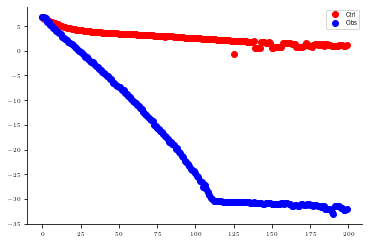

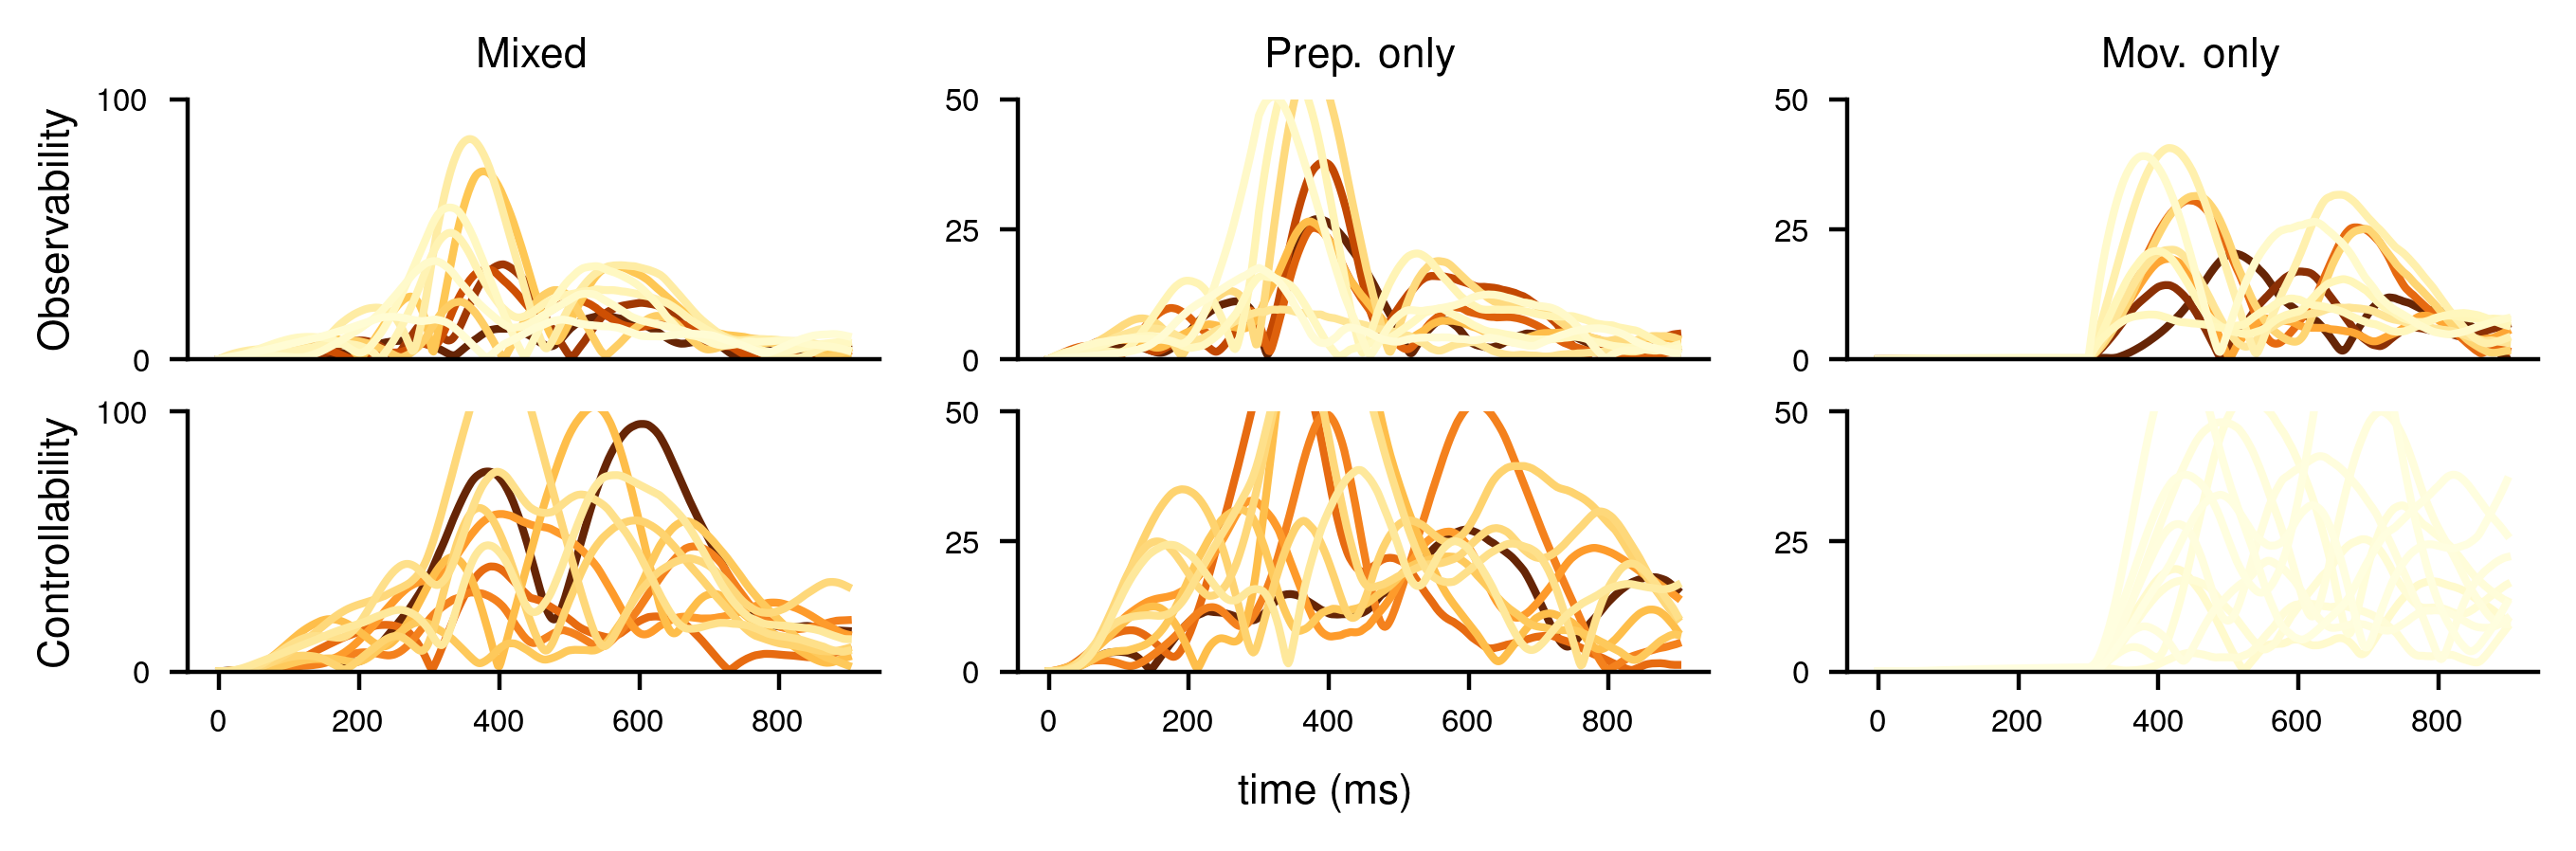

In [37]:
fig,axes=plt.subplots(2,3, figsize=(8, 2),dpi=400)
font = {'family':'sans-serif','sans-serif':'Helvetica'}
mpl.rcParams['font.family'] = "sans-serif"
mpl.rcParams['font.sans-serif'] = ['Helvetica']
matplotlib.rc('axes', titlesize=fs)     # fontsize of the axes title
matplotlib.rc('axes', labelsize=fs)   
# mpl.rcParams['xtick.font'] = ['Helvetica']
n_shift = 600
p = sns.color_palette("YlOrBr", 1001)
n=10
for i in range(n):
    o = obs_c_mixed[:,n-i]
    o_max = np.abs(o).max()  
    if not(np.isclose(np.max(o),o_max)):
        o = -o
    axes[0,0].plot(o, color=p[int(obs_eigs_mixed[i])])
axes[0,0].set_title("Mixed")
axes[0,0].set_xticks([])
axes[0,0].set_ylim(0,100)
axes[0,0].set_yticks([0,100],[0,100])
axes[0,0].set_ylabel("Observability")

for i in range(n):
    o = obs_c_prep[:,n-i]
    o_max = np.abs(o).max()  
    if not(np.isclose(np.max(o),o_max)):
        o = -o
    axes[0,1].plot(o, color=p[int(obs_eigs_prep[i])])
axes[0,1].set_xticks([])
axes[0,1].set_ylim(0,40)
axes[0,1].set_yticks([0,25,50], [0,25,50])
axes[0,1].set_title("Prep. only")

for i in range(n):
    o = obs_c_mov[:,n-i]
    o_max = np.abs(o).max()  
    if not(np.isclose(np.max(o),o_max)):
        o = -o
    axes[0,2].plot(obs_c_mov[:,n-i], color=p[int(obs_eigs_mov[i])])
axes[0,2].set_xticks([])
axes[0,2].set_ylim(0,40)
axes[0,2].set_yticks([0,25,50], [0,25,50])
axes[0,2].set_title("Mov. only")

for i in range(n):
    o = ctr_mixed[:,n-i]
    o_max = np.abs(o).max()  
    if not(np.isclose(np.max(o),o_max)):
        o = -o
    axes[1,0].plot(o, color=p[int(ctr_eigs_mixed[i])])
axes[1,0].set_ylabel("Controllability")
axes[1,0].set_ylim(0,100)
axes[1,0].set_yticks([0,100], [0,100])
axes[1,0].set_xticks([0,100,200,300,400], [0,200,400,600,800])

for i in range(n):
    o = ctr_prep[:,n-i]
    o_max = np.abs(o).max()  
    if not(np.isclose(np.max(o),o_max)):
        o = -o
    axes[1,1].plot(o, color=p[int(ctr_eigs_prep[i])])
axes[1,1].set_xticks([0,100,200,300,400], [0,200,400,600,800])
axes[1,1].set_ylim(0,50)
axes[1,1].set_yticks([0,25,50], [0,25,50])
for i in range(n):
    o = ctr_mov[:,n-i]
    o_max = np.abs(o).max()  
    if not(np.isclose(np.max(o),o_max)):
        o = -o
    axes[1,2].plot(o, color=p[int(ctr_eigs_mov[i])])
axes[1,2].set_xticks([0,100,200,300,400], [0,200,400,600,800])
axes[1,2].set_ylim(0,50)
axes[1,2].set_yticks([0,25,50], [0,25,50])
# for i in range(50):
#     axes[2,0].plot(obs_c_mov[:,i], color=palette[i])
# axes[2,0].set_ylabel("Move")

# for i in range(50):
#     axes[2,1].plot(obs_id_mov[:,i], color=palette[i])

# for i in range(50):
#     axes[2,2].plot(ctr_mov[:,i], color=palette[i])
fig.text(0.5, -0.05, "time (ms)", size = 8, ha='center')
fig.savefig("gramians_eigs.pdf", format = "pdf", bbox_inches='tight')